# This data set contains yearly suicide detail of all the states/u.t of India by various parameters from 2001 to 2012.

## Importing necessary Libraries

In [31]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

## Reading the Dataset

In [32]:
data= pd.read_csv(r'C:\Users\Dell\Desktop\Food_Demand_for\Suicides in India 2001-2012.csv')

In [33]:
data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [34]:
data.shape

(237519, 7)

In [35]:
print('Data contains', data.shape[0],'rows and', data.shape[1], 'columns')

Data contains 237519 rows and 7 columns


In [36]:
# Checking the data type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [37]:
# 5 point summary of numerical columns
data.describe()

,Year,Total
count,237519.000000,237519.000000
mean,2006.500448,55.034477
std,3.452240,792.749038
min,2001.000000,0.000000
25%,2004.000000,0.000000
50%,2007.000000,0.000000
75%,2010.000000,6.000000
max,2012.000000,63343.000000


In [38]:
# Checking null values 
data.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

* There are no null values in the data

# Data Preprocessing

In [39]:
data.columns

Index(['State', 'Year', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total'], dtype='object')

In [40]:
data.Type_code.value_counts()

Causes                  109200
Means_adopted            67200
Professional_Profile     49263
Education_Status          7296
Social_Status             4560
Name: Type_code, dtype: int64

In [41]:
data.Year.value_counts()

2011    19806
2005    19803
2012    19799
2001    19797
2008    19797
2007    19794
2010    19792
2002    19790
2003    19786
2006    19786
2009    19786
2004    19783
Name: Year, dtype: int64

In [19]:
data.State.value_counts()

Madhya Pradesh       6792
Maharashtra          6792
Karnataka            6792
Odisha               6791
Andhra Pradesh       6791
Rajasthan            6791
Bihar                6790
Chhattisgarh         6790
Haryana              6790
Kerala               6788
Uttar Pradesh        6787
Assam                6786
Tamil Nadu           6786
Gujarat              6786
Jharkhand            6785
Tripura              6782
Delhi (Ut)           6782
West Bengal          6780
Punjab               6779
Himachal Pradesh     6774
Jammu & Kashmir      6761
Goa                  6759
Uttarakhand          6758
Sikkim               6742
Mizoram              6737
Meghalaya            6733
Puducherry           6730
Chandigarh           6717
A & N Islands        6712
Daman & Diu          6710
Arunachal Pradesh    6707
Nagaland             6705
D & N Haveli         6704
Manipur              6700
Lakshadweep          6674
Total (All India)     312
Total (States)        312
Total (Uts)           312
Name: State,

* As we can say, there are some irrelavent rows in the last named as Total (All India), Total (States), Total (Uts), dropping the unnecessary rows form the dataset

In [44]:
rows_to_delete= data[(data['State']=='Total (All India)')|(data['State']=='Total (States)')|(data['State']=='Total (Uts)')].index
data.drop(rows_to_delete,inplace=True)

In [45]:
data['State'].value_counts()

Karnataka            6792
Madhya Pradesh       6792
Maharashtra          6792
Andhra Pradesh       6791
Odisha               6791
Rajasthan            6791
Chhattisgarh         6790
Bihar                6790
Haryana              6790
Kerala               6788
Uttar Pradesh        6787
Tamil Nadu           6786
Gujarat              6786
Assam                6786
Jharkhand            6785
Tripura              6782
Delhi (Ut)           6782
West Bengal          6780
Punjab               6779
Himachal Pradesh     6774
Jammu & Kashmir      6761
Goa                  6759
Uttarakhand          6758
Sikkim               6742
Mizoram              6737
Meghalaya            6733
Puducherry           6730
Chandigarh           6717
A & N Islands        6712
Daman & Diu          6710
Arunachal Pradesh    6707
Nagaland             6705
D & N Haveli         6704
Manipur              6700
Lakshadweep          6674
Name: State, dtype: int64

In [21]:
data.Gender.value_counts()

Male      118879
Female    118640
Name: Gender, dtype: int64

In [23]:
data.Age_group.value_counts()

15-29     45223
30-44     45193
45-59     45146
60+       45074
0-14      45027
0-100+    11856
Name: Age_group, dtype: int64

## Exploratory Data Analysis

### Univariate Analysis

In [209]:
cats= data.select_dtypes(exclude=np.number)

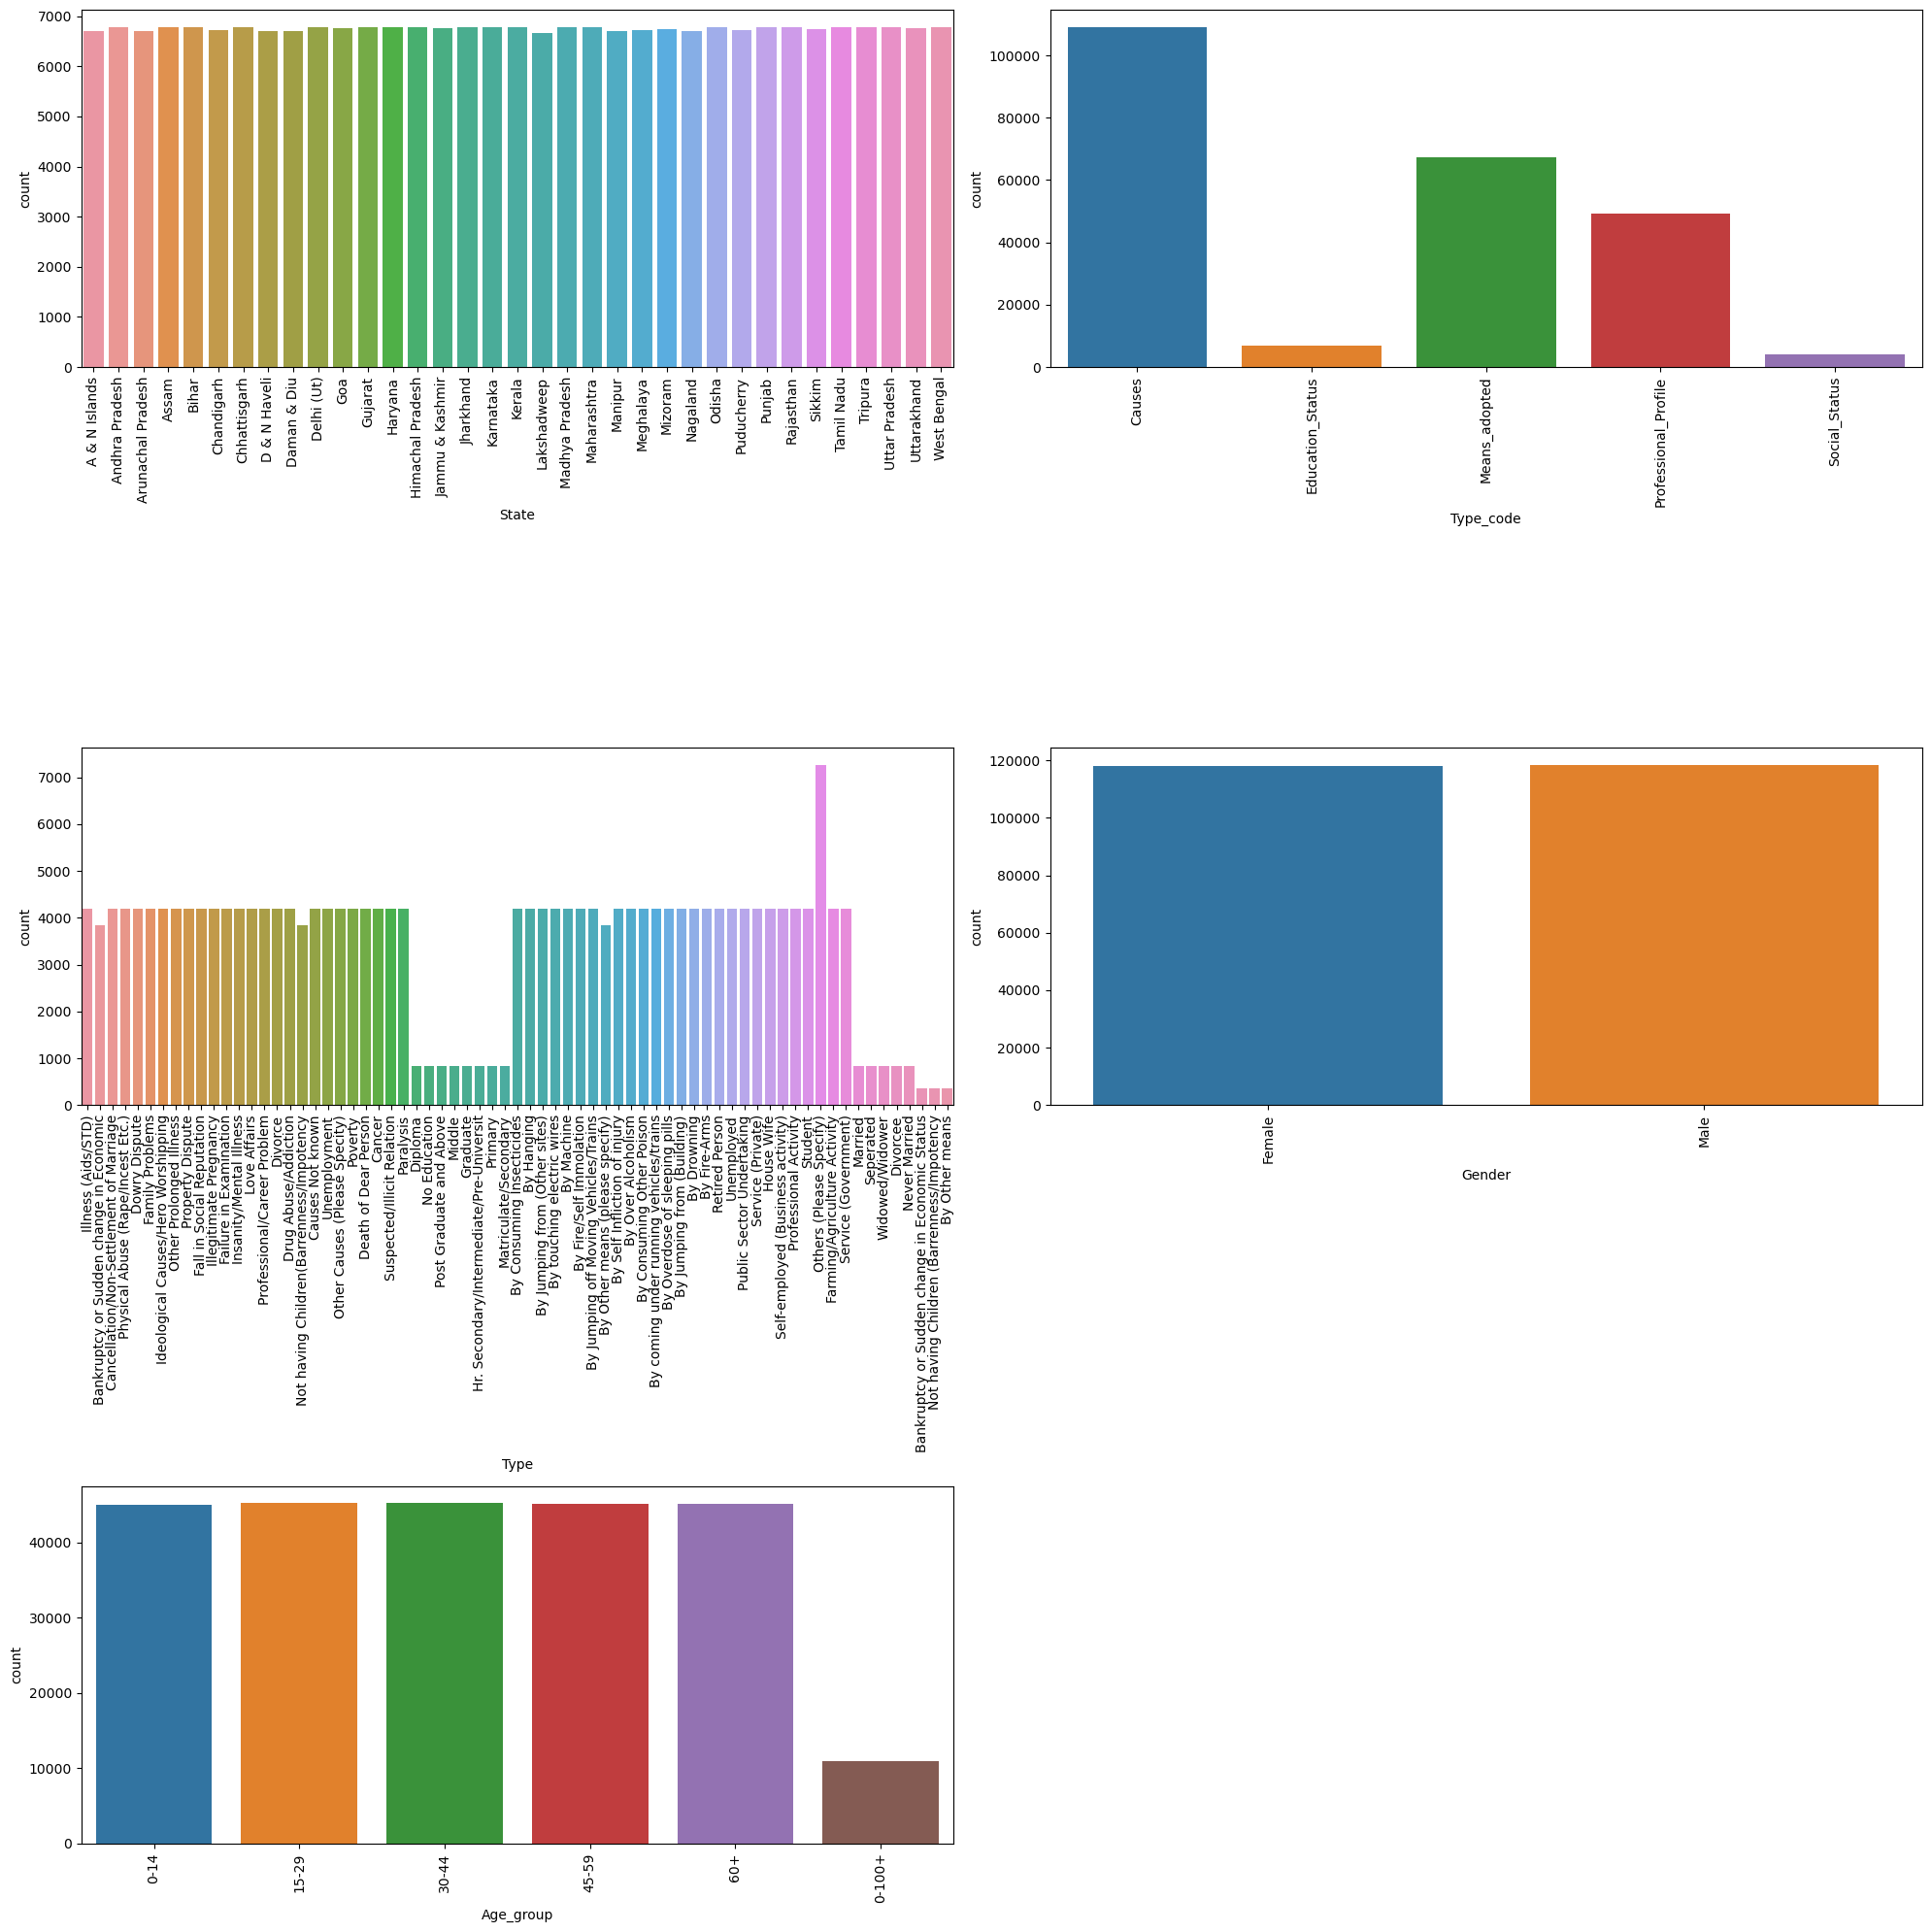

In [213]:
plt.figure(figsize=(20,20))
t=1
for i in cats.columns:
    plt.subplot(3,2,t)
    sns.countplot(data[i])
    plt.xticks(rotation=90)
    t+=1
plt.tight_layout()
plt.show()

### Total number of people who has committed suicide from 2001-2012

In [55]:
data.Year.value_counts()

2011    19728
2005    19725
2012    19721
2001    19719
2008    19719
2007    19716
2010    19714
2002    19712
2003    19708
2006    19708
2009    19708
2004    19705
Name: Year, dtype: int64

### Suicide across states

In [53]:
data['State'].value_counts()

Karnataka            6792
Madhya Pradesh       6792
Maharashtra          6792
Andhra Pradesh       6791
Odisha               6791
Rajasthan            6791
Chhattisgarh         6790
Bihar                6790
Haryana              6790
Kerala               6788
Uttar Pradesh        6787
Tamil Nadu           6786
Gujarat              6786
Assam                6786
Jharkhand            6785
Tripura              6782
Delhi (Ut)           6782
West Bengal          6780
Punjab               6779
Himachal Pradesh     6774
Jammu & Kashmir      6761
Goa                  6759
Uttarakhand          6758
Sikkim               6742
Mizoram              6737
Meghalaya            6733
Puducherry           6730
Chandigarh           6717
A & N Islands        6712
Daman & Diu          6710
Arunachal Pradesh    6707
Nagaland             6705
D & N Haveli         6704
Manipur              6700
Lakshadweep          6674
Name: State, dtype: int64

### Gender which tends to commit more suicides

Male      118411
Female    118172
Name: Gender, dtype: int64


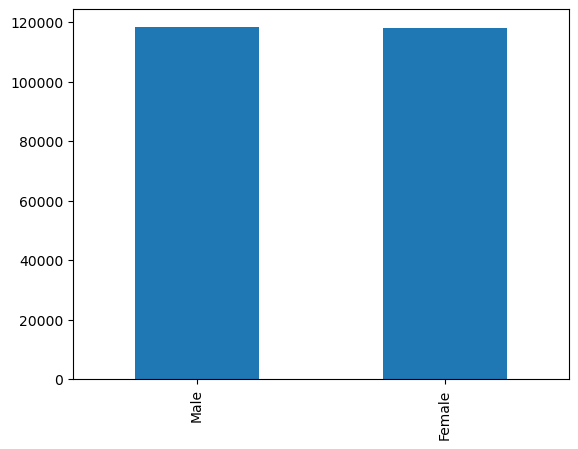

In [59]:
data['Gender'].value_counts().plot(kind='bar')
print(data['Gender'].value_counts())

### Rate of change of the number of cases over the years

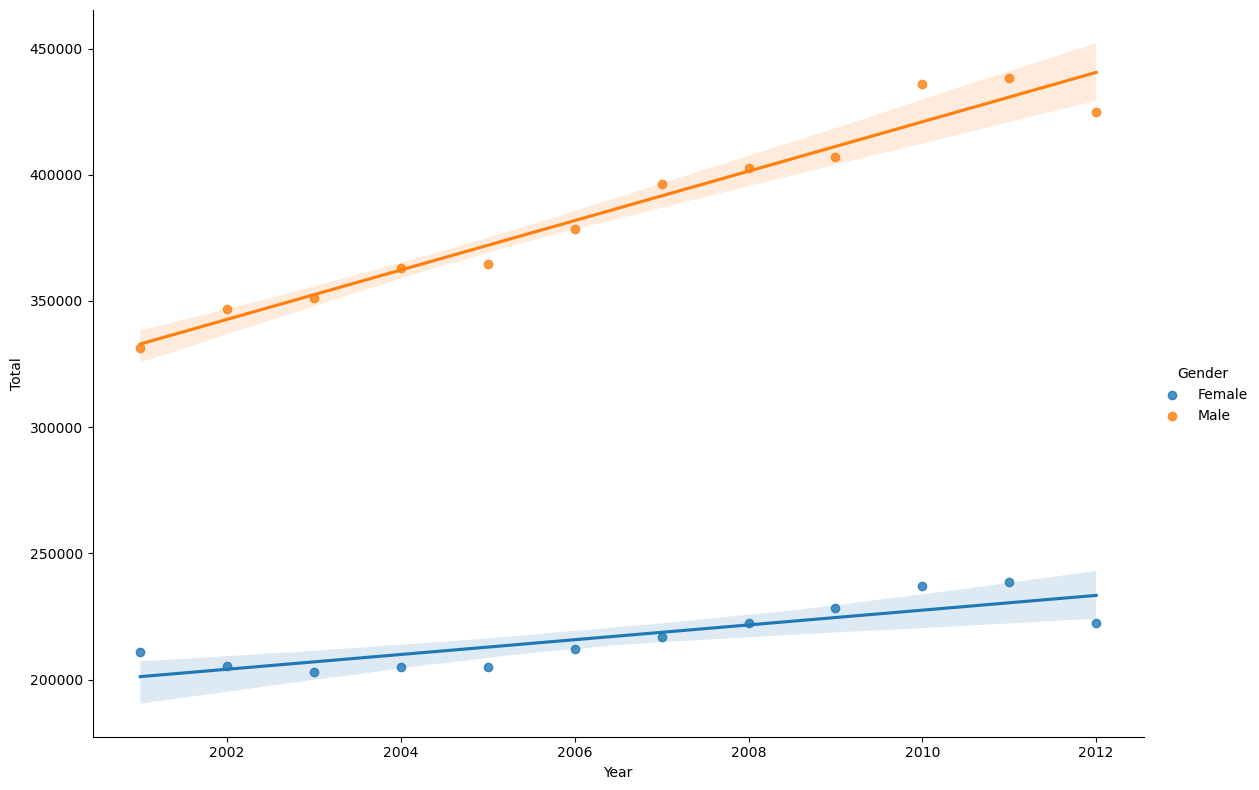

In [81]:
grp_year = data.groupby(["Year","Gender"])["Total"].sum()
grp_year = pd.DataFrame(grp_year).reset_index()
sns.lmplot(x="Year", y="Total", hue="Gender", data=grp_year,height=8, aspect=11.7/8)
plt.show()

### Comparison of the suicide of the Gender over the years

In [83]:
data.groupby(['Year','Gender'])['Total'].count()

Year  Gender
2001  Female    9847
      Male      9872
2002  Female    9845
      Male      9867
2003  Female    9847
      Male      9861
2004  Female    9841
      Male      9864
2005  Female    9853
      Male      9872
2006  Female    9844
      Male      9864
2007  Female    9849
      Male      9867
2008  Female    9852
      Male      9867
2009  Female    9846
      Male      9862
2010  Female    9844
      Male      9870
2011  Female    9852
      Male      9876
2012  Female    9852
      Male      9869
Name: Total, dtype: int64

### Gender wise suicide in States

In [72]:
data.groupby(['Gender','State'])['Total'].count()

Gender  State            
Female  A & N Islands        3345
        Andhra Pradesh       3395
        Arunachal Pradesh    3351
        Assam                3392
        Bihar                3394
        Chandigarh           3350
        Chhattisgarh         3394
        D & N Haveli         3343
        Daman & Diu          3348
        Delhi (Ut)           3388
        Goa                  3374
        Gujarat              3390
        Haryana              3394
        Himachal Pradesh     3385
        Jammu & Kashmir      3379
        Jharkhand            3390
        Karnataka            3396
        Kerala               3394
        Lakshadweep          3336
        Madhya Pradesh       3396
        Maharashtra          3396
        Manipur              3343
        Meghalaya            3358
        Mizoram              3361
        Nagaland             3345
        Odisha               3396
        Puducherry           3349
        Punjab               3387
        Rajasthan     

### Cause of Suicides

In [74]:
data.columns

Index(['State', 'Year', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total'], dtype='object')

In [75]:
data.Type.unique()

array(['Illness (Aids/STD)', 'Bankruptcy or Sudden change in Economic',
       'Cancellation/Non-Settlement of Marriage',
       'Physical Abuse (Rape/Incest Etc.)', 'Dowry Dispute',
       'Family Problems', 'Ideological Causes/Hero Worshipping',
       'Other Prolonged Illness', 'Property Dispute',
       'Fall in Social Reputation', 'Illegitimate Pregnancy',
       'Failure in Examination', 'Insanity/Mental Illness',
       'Love Affairs', 'Professional/Career Problem', 'Divorce',
       'Drug Abuse/Addiction', 'Not having Children(Barrenness/Impotency',
       'Causes Not known', 'Unemployment',
       'Other Causes (Please Specity)', 'Poverty', 'Death of Dear Person',
       'Cancer', 'Suspected/Illicit Relation', 'Paralysis', 'Diploma',
       'No Education', 'Post Graduate and Above', 'Middle', 'Graduate',
       'Hr. Secondary/Intermediate/Pre-Universit', 'Primary',
       'Matriculate/Secondary', 'By Consuming Insecticides', 'By Hanging',
       'By Jumping from (Other sites)'

### Gender wise Suicides on the basis of Family Problems

In [90]:
data_Familyprob = data[data['Type']=='Family Problems']

Gender
Female    133181
Male      208771
Name: Total, dtype: int64


<AxesSubplot:xlabel='Gender'>

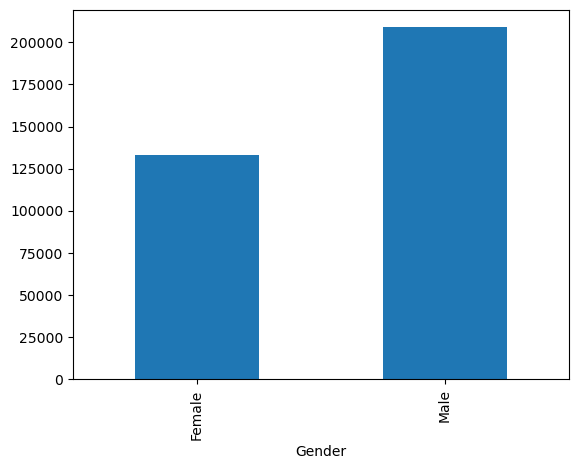

In [94]:
print(data_Familyprob.groupby(['Gender'])['Total'].sum())
data_Familyprob.groupby(['Gender'])['Total'].sum().plot(kind='bar')

* Inference- Male suicide count is more beacuse of family problems as compared to female

### Age-group wise Suicide rates on the basis of Family Problems

In [93]:
data_Familyprob.columns

Index(['State', 'Year', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total'], dtype='object')

Age_group
0-14       4254
15-29    121427
30-44    125135
45-59     69465
60+       21671
Name: Total, dtype: int64


<AxesSubplot:xlabel='Age_group'>

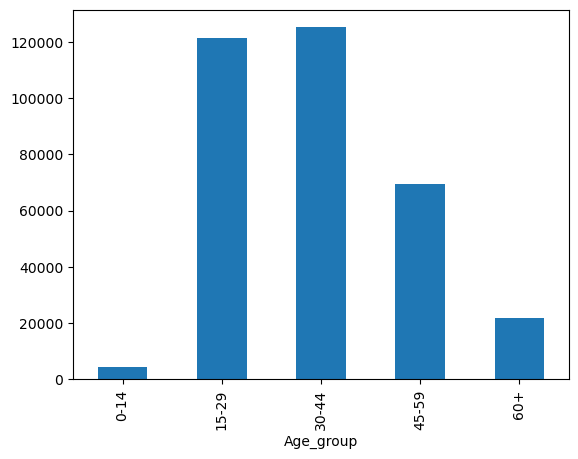

In [96]:
print(data_Familyprob.groupby(['Age_group'])['Total'].sum())
data_Familyprob.groupby(['Age_group'])['Total'].sum().plot(kind='bar')

* Inference- People with the age group 15-29 and 30-44 has more suicidal counts due to family problems

### State wise Suicide rates on the basis of Family Problems

State
A & N Islands           99
Andhra Pradesh       30696
Arunachal Pradesh       96
Assam                 4312
Bihar                 1824
Chandigarh             303
Chhattisgarh          8066
D & N Haveli           187
Daman & Diu             16
Delhi (Ut)            4105
Goa                    470
Gujarat              13057
Haryana               5045
Himachal Pradesh      1144
Jammu & Kashmir        426
Jharkhand             1146
Karnataka            24042
Kerala               36327
Lakshadweep              1
Madhya Pradesh       18281
Maharashtra          65341
Manipur                 26
Meghalaya              180
Mizoram                 32
Nagaland                26
Odisha               11924
Puducherry            2724
Punjab                1506
Rajasthan            11430
Sikkim                 234
Tamil Nadu           49663
Tripura               2743
Uttar Pradesh         9733
Uttarakhand            862
West Bengal          35885
Name: Total, dtype: int64


<AxesSubplot:xlabel='State'>

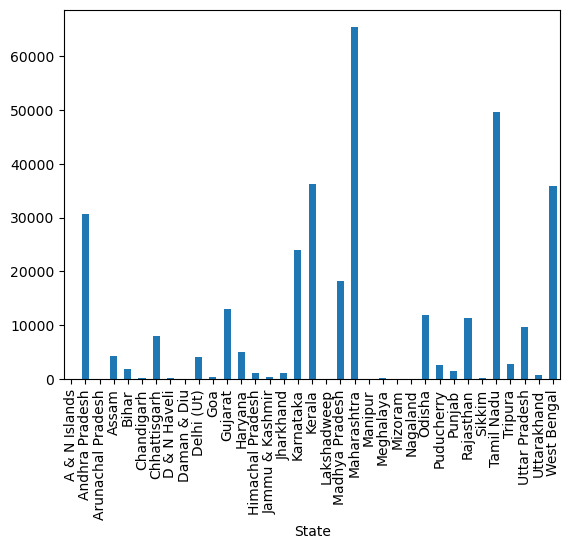

In [98]:
print(data_Familyprob.groupby(['State'])['Total'].sum())
data_Familyprob.groupby(['State'])['Total'].sum().plot(kind='bar')

* Inference- Maharashtra state has more suicidal counts due to family problems

### Gender wise Suicide on the basis of Mental Illness

In [101]:
data_mentill= data[data['Type']=='Insanity/Mental Illness']

Gender
Female    33352
Male      60877
Name: Total, dtype: int64


<AxesSubplot:xlabel='Gender'>

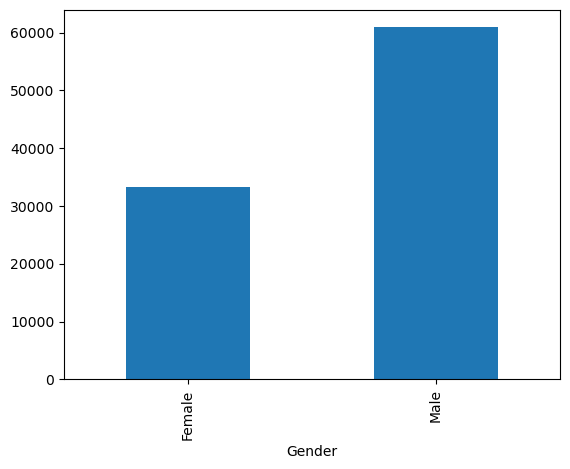

In [105]:
print(data_mentill.groupby(['Gender'])['Total'].sum())
data_mentill.groupby(['Gender'])['Total'].sum().plot(kind='bar')

* Inference- Male has more suicidal chances due to insanity/mental illness

### Age-group wise Suicide rates on the basis of Mental Illness

Age_group
0-14      1223
15-29    27259
30-44    32506
45-59    22748
60+      10493
Name: Total, dtype: int64


<AxesSubplot:xlabel='Age_group'>

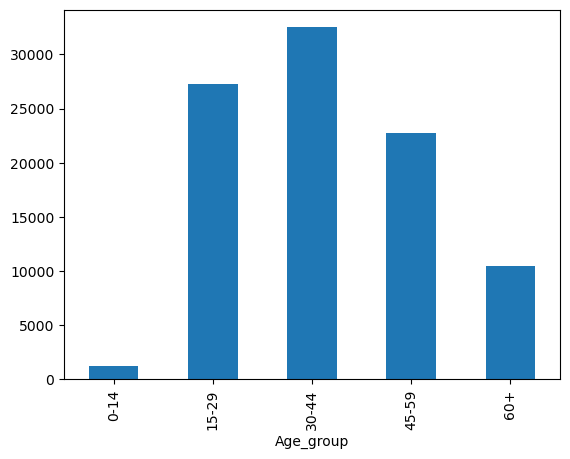

In [107]:
print(data_mentill.groupby(['Age_group'])['Total'].sum())
data_mentill.groupby(['Age_group'])['Total'].sum().plot(kind='bar')

* Inference- People with age group 30-44 have more suicidal chances due to mental illness

### State wise Suicide rates on the basis of Mental Illness

State
A & N Islands          238
Andhra Pradesh       10521
Arunachal Pradesh       20
Assam                  513
Bihar                  294
Chandigarh              40
Chhattisgarh          2972
D & N Haveli            61
Daman & Diu             17
Delhi (Ut)             308
Goa                    602
Gujarat               6761
Haryana               1327
Himachal Pradesh       377
Jammu & Kashmir         34
Jharkhand              426
Karnataka             7325
Kerala               15276
Lakshadweep              3
Madhya Pradesh        4670
Maharashtra          14859
Manipur                  0
Meghalaya               48
Mizoram                  1
Nagaland                 2
Odisha                1044
Puducherry             369
Punjab                2182
Rajasthan             4782
Sikkim                 291
Tamil Nadu            4974
Tripura                260
Uttar Pradesh         1880
Uttarakhand            188
West Bengal          11564
Name: Total, dtype: int64


<AxesSubplot:xlabel='State'>

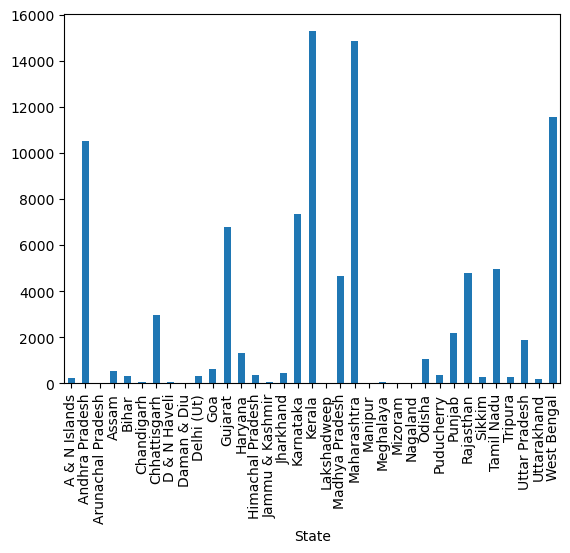

In [108]:
print(data_mentill.groupby(['State'])['Total'].sum())
data_mentill.groupby(['State'])['Total'].sum().plot(kind='bar')

* Inference- Maharashtra and Kerela states has more suicidal chances than any other states due to mental illness

### Gender wise Suicide on the basis of Love Affairs:

In [109]:
data_LoveAff= data[data['Type']=='Love Affairs']

Gender
Female    21339
Male      23700
Name: Total, dtype: int64


<AxesSubplot:xlabel='Gender'>

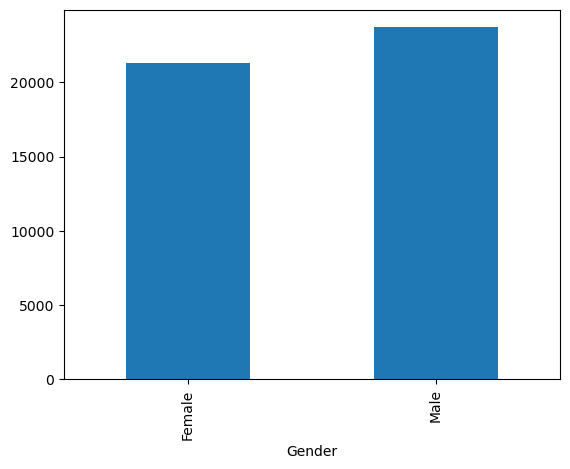

In [111]:
print(data_LoveAff.groupby(['Gender'])['Total'].sum())
data_LoveAff.groupby(['Gender'])['Total'].sum().plot(kind='bar')

* Inference- Both gender has the approx same counts that means they attempt suicide due to Love Affairs

### Age-group wise Suicide rates on the basis of Love Affairs

Age_group
0-14      1250
15-29    33023
30-44     9866
45-59      862
60+         38
Name: Total, dtype: int64


<AxesSubplot:xlabel='Age_group'>

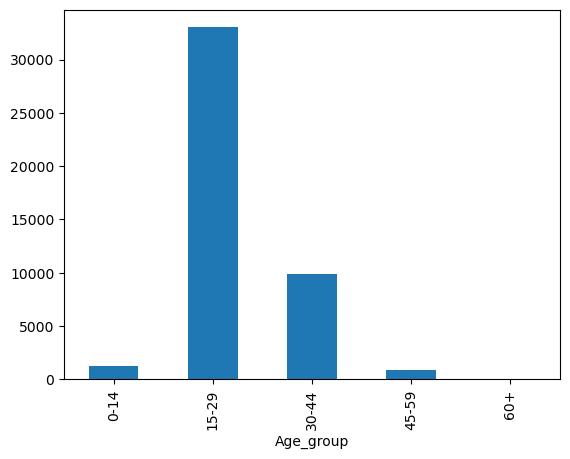

In [113]:
print(data_LoveAff.groupby(['Age_group'])['Total'].sum())
data_LoveAff.groupby(['Age_group'])['Total'].sum().plot(kind='bar')

* Inference- People with age group 15-29 suicide count is more than any other age group

### State wise Suicide rates on the basis of Love Affairs

State
A & N Islands          75
Andhra Pradesh       3325
Arunachal Pradesh      27
Assam                4852
Bihar                 478
Chandigarh             41
Chhattisgarh         1306
D & N Haveli           42
Daman & Diu            12
Delhi (Ut)            584
Goa                   194
Gujarat              2318
Haryana               429
Himachal Pradesh      216
Jammu & Kashmir       121
Jharkhand             408
Karnataka            1701
Kerala               1223
Lakshadweep             0
Madhya Pradesh       2303
Maharashtra          2872
Manipur                19
Meghalaya              47
Mizoram                 7
Nagaland                6
Odisha               2585
Puducherry             88
Punjab                185
Rajasthan            1109
Sikkim                 47
Tamil Nadu           5684
Tripura               812
Uttar Pradesh        2166
Uttarakhand           151
West Bengal          9606
Name: Total, dtype: int64


<AxesSubplot:xlabel='State'>

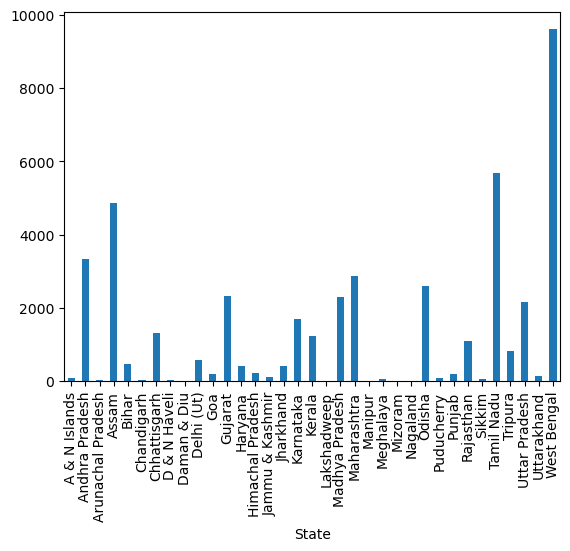

In [115]:
print(data_LoveAff.groupby(['State'])['Total'].sum())
data_LoveAff.groupby(['State'])['Total'].sum().plot(kind='bar')

* Inference- People in west bengal has more suicidal counts than any other state due to love affairs

### Gender wise Suicide on the basis of Economic Factors

In [119]:
data_Ecofact= data[data['Type']=='Bankruptcy or Sudden change in Economic']

Gender
Female     3877
Male      28878
Name: Total, dtype: int64


<AxesSubplot:xlabel='Gender'>

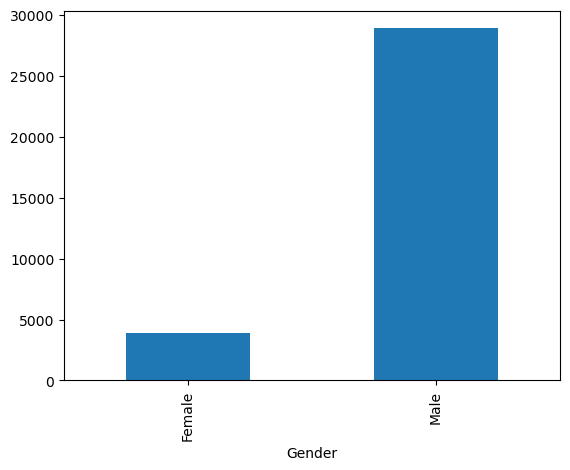

In [121]:
print(data_Ecofact.groupby(['Gender'])['Total'].sum())
data_Ecofact.groupby(['Gender'])['Total'].sum().plot(kind='bar')

* Inference- Male count is more in suicide commits due to economic factors as compared with female

### Age-group wise Suicide rates on the basis of Economic Factorsm

Age_group
0-14       107
15-29     5796
30-44    13582
45-59    10421
60+       2849
Name: Total, dtype: int64


<AxesSubplot:xlabel='Age_group'>

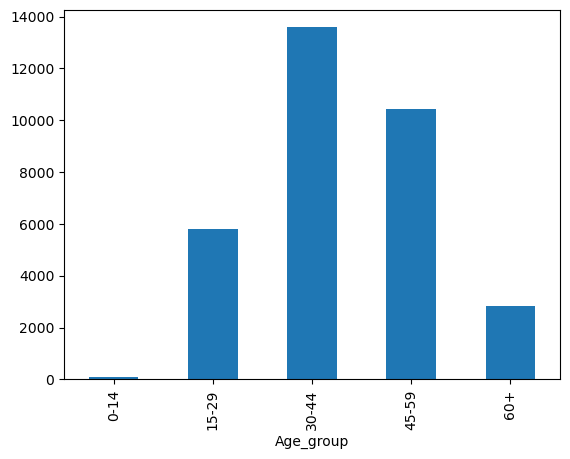

In [123]:
print(data_Ecofact.groupby(['Age_group'])['Total'].sum())
data_Ecofact.groupby(['Age_group'])['Total'].sum().plot(kind='bar')

* Inference- People with age group of 30-44 commits suicide more due to economic factors

### State wise Suicide rates on the basis of Economic Factors

State
A & N Islands           3
Andhra Pradesh       8112
Arunachal Pradesh       8
Assam                  99
Bihar                  34
Chandigarh              9
Chhattisgarh          449
D & N Haveli            4
Daman & Diu             0
Delhi (Ut)            223
Goa                    58
Gujarat              1509
Haryana               147
Himachal Pradesh       21
Jammu & Kashmir        48
Jharkhand             246
Karnataka            2286
Kerala               7827
Lakshadweep             0
Madhya Pradesh        802
Maharashtra          6732
Manipur                 0
Meghalaya               3
Mizoram                 4
Nagaland                1
Odisha                163
Puducherry             35
Punjab                 84
Rajasthan             611
Sikkim                 22
Tamil Nadu           1617
Tripura               114
Uttar Pradesh         398
Uttarakhand            92
West Bengal           994
Name: Total, dtype: int64


<AxesSubplot:xlabel='State'>

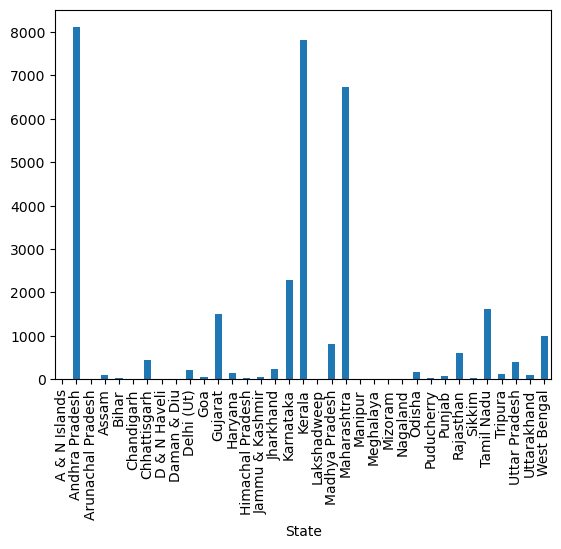

In [125]:
print(data_Ecofact.groupby(['State'])['Total'].sum())
data_Ecofact.groupby(['State'])['Total'].sum().plot(kind='bar')

* Kerela, Maharashtra and Andhra Pradesh has more suicidal counts due to economic factors

### Suicides on the basis of genders by State,Year and Cause

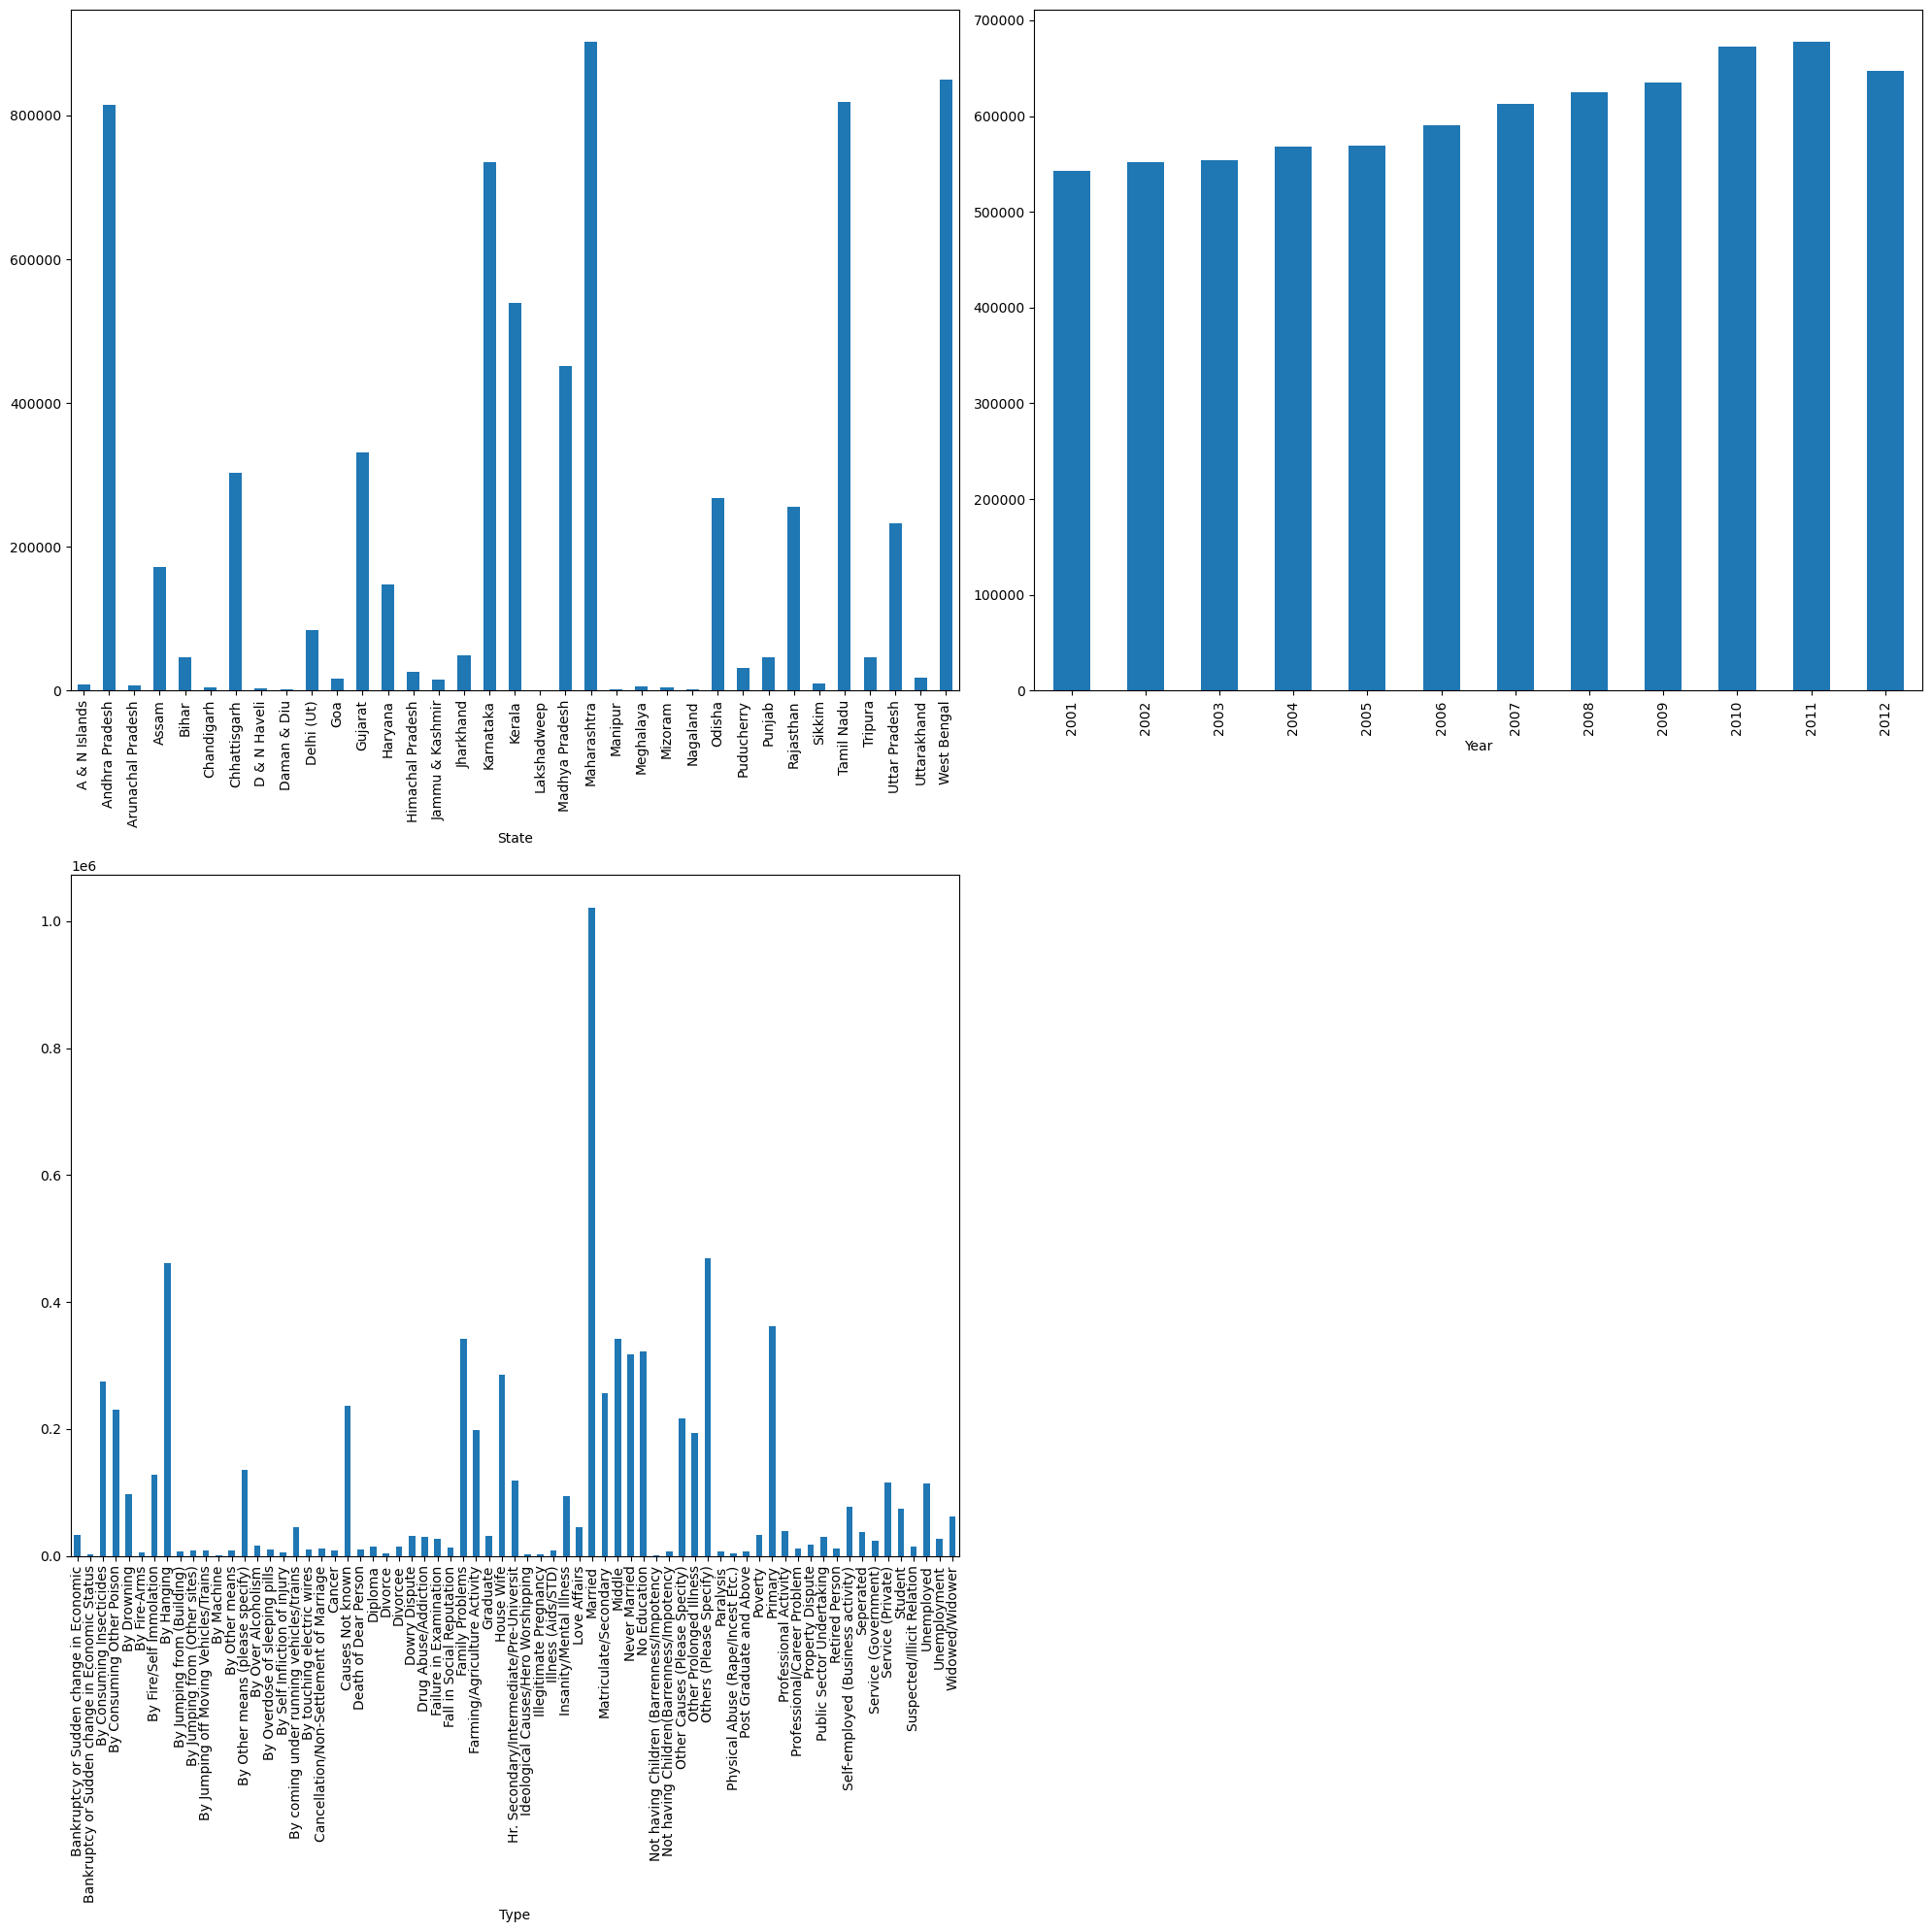

In [224]:
cols= ['State','Year','Type']
plt.figure(figsize=(20,20))
t=1
for i in cols:
    plt.subplot(2,2,t)
    data.groupby([i])['Total'].sum().plot(kind='bar')
    plt.xticks(rotation=90)
    t+=1
plt.tight_layout()
plt.show()

### Education Status of People who have committed suicide

In [139]:
data_edstat= data[data['Type_code']=='Education_Status']

Type
Diploma                                      14153
Graduate                                     31274
Hr. Secondary/Intermediate/Pre-Universit    118908
Matriculate/Secondary                       256566
Middle                                      342971
No Education                                321757
Post Graduate and Above                       7475
Primary                                     362827
Name: Total, dtype: int64


<AxesSubplot:xlabel='Type'>

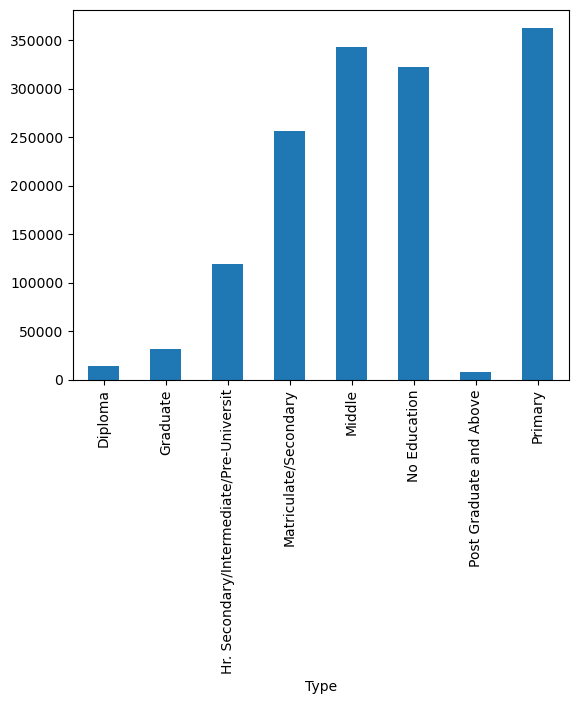

In [142]:
print(data_edstat.groupby(['Type'])['Total'].sum())
data_edstat.groupby(['Type'])['Total'].sum().plot(kind='bar')

### Year wise suicide rates of people with No education:

In [143]:
data_noed= data[data['Type']=='No Education']

In [146]:
data_noed.groupby(['Year'])['Total'].sum()

Year
2001    28725
2002    28442
2003    25964
2004    26916
2005    26234
2006    25165
2007    26772
2008    25920
2009    27238
2010    26702
2011    27038
2012    26641
Name: Total, dtype: int64

### Top 10 States with suicide rates where people arent educated

State
Andhra Pradesh    54938
Karnataka         42311
Tamil Nadu        39499
West Bengal       31356
Maharashtra       27088
Madhya Pradesh    23384
Chhattisgarh      15612
Rajasthan         14653
Gujarat           14504
Odisha            11877
Name: Total, dtype: int64


<AxesSubplot:xlabel='State'>

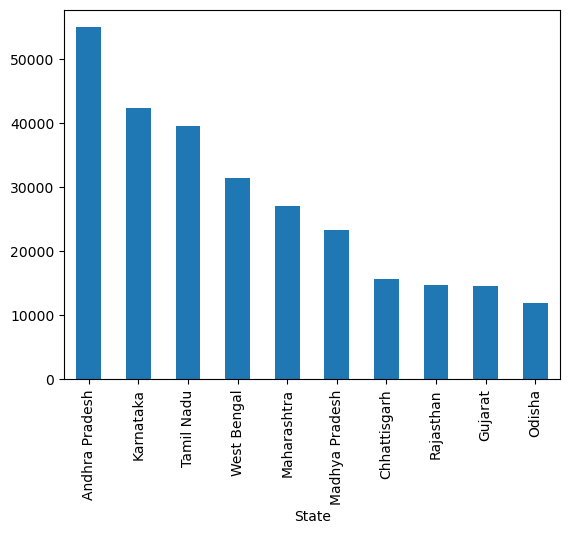

In [153]:
a= data_noed.groupby(['State'])['Total'].sum()
print(a.sort_values(ascending=False).head(10))
a.sort_values(ascending=False).head(10).plot(kind='bar')

### Suicides of People with Primary Education

In [163]:
data.columns

Index(['State', 'Year', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total'], dtype='object')

In [183]:
data.loc[data['Type']=='Primary',['Total']].sum()

Total    362827
dtype: int64

### Year wise suicide rates of people with primary education:

In [ ]:
data_prim= data[data['Type']=='Primary']

Gender
Female    136340
Male      226487
Name: Total, dtype: int64


<AxesSubplot:xlabel='Gender'>

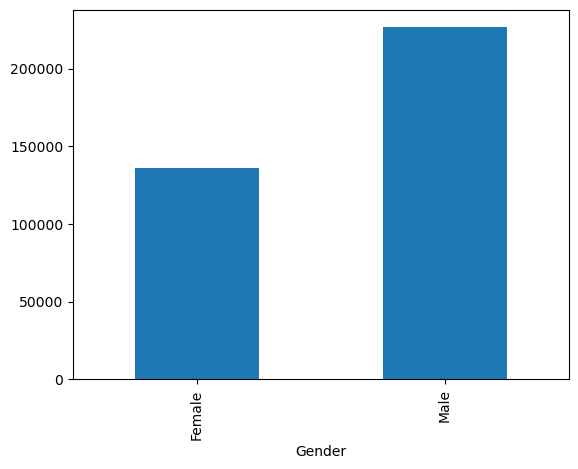

In [167]:
print(data_prim.groupby(['Gender'])['Total'].sum())
data_prim.groupby(['Gender'])['Total'].sum().plot(kind='bar')

### Top 10 States with High Suicide rates among the primarily educated:

In [173]:
counts= data_prim.groupby(['State'])['Total'].sum()
counts.sort_values(ascending=False).head(10)

State
West Bengal       54911
Maharashtra       48474
Karnataka         38107
Andhra Pradesh    36929
Tamil Nadu        34754
Kerala            24786
Gujarat           24455
Madhya Pradesh    21630
Chhattisgarh      16313
Rajasthan         12437
Name: Total, dtype: int64

### Suicides on the basis of genders by State,Gender and Age-Group

### Profession of the People who committed suicide:

In [181]:
data['Type_code'].unique()

array(['Causes', 'Education_Status', 'Means_adopted',
       'Professional_Profile', 'Social_Status'], dtype=object)

In [186]:
data.loc[data['Type_code']=='Professional_Profile',['Type']].value_counts()

Type                             
Others (Please Specify)              7263
Farming/Agriculture Activity         4200
House Wife                           4200
Professional Activity                4200
Public Sector Undertaking            4200
Retired Person                       4200
Self-employed (Business activity)    4200
Service (Government)                 4200
Service (Private)                    4200
Student                              4200
Unemployed                           4200
dtype: int64

### Age-group wise suicide rates of Housewives

In [189]:
data.loc[data['Type']=='House Wife',['Age_group']].value_counts()

Age_group
0-14         840
15-29        840
30-44        840
45-59        840
60+          840
dtype: int64

### State wise suicide rates of Housewives

In [190]:
data.loc[data['Type']=='House Wife',['State']].value_counts()

State            
A & N Islands        120
Puducherry           120
Maharashtra          120
Manipur              120
Meghalaya            120
Mizoram              120
Nagaland             120
Odisha               120
Punjab               120
Lakshadweep          120
Rajasthan            120
Sikkim               120
Tamil Nadu           120
Tripura              120
Uttar Pradesh        120
Uttarakhand          120
Madhya Pradesh       120
Kerala               120
Andhra Pradesh       120
Daman & Diu          120
Arunachal Pradesh    120
Assam                120
Bihar                120
Chandigarh           120
Chhattisgarh         120
D & N Haveli         120
Delhi (Ut)           120
Karnataka            120
Goa                  120
Gujarat              120
Haryana              120
Himachal Pradesh     120
Jammu & Kashmir      120
Jharkhand            120
West Bengal          120
dtype: int64

### Suicides rates of people associated with farming

In [192]:
data.loc[data['Type']=='Farming/Agriculture Activity',['Type']].count()

Type    4200
dtype: int64

### Age-group wise suicide rates of people associated with Farming

In [195]:
data.loc[data['Type']=='Farming/Agriculture Activity',['Age_group']].value_counts()

Age_group
0-14         840
15-29        840
30-44        840
45-59        840
60+          840
dtype: int64

### State wise suicide rates of people Associated with Farming

In [196]:
data.loc[data['Type']=='Farming/Agriculture Activity',['State']].value_counts()

State            
A & N Islands        120
Puducherry           120
Maharashtra          120
Manipur              120
Meghalaya            120
Mizoram              120
Nagaland             120
Odisha               120
Punjab               120
Lakshadweep          120
Rajasthan            120
Sikkim               120
Tamil Nadu           120
Tripura              120
Uttar Pradesh        120
Uttarakhand          120
Madhya Pradesh       120
Kerala               120
Andhra Pradesh       120
Daman & Diu          120
Arunachal Pradesh    120
Assam                120
Bihar                120
Chandigarh           120
Chhattisgarh         120
D & N Haveli         120
Delhi (Ut)           120
Karnataka            120
Goa                  120
Gujarat              120
Haryana              120
Himachal Pradesh     120
Jammu & Kashmir      120
Jharkhand            120
West Bengal          120
dtype: int64

### Means adopted to suicide

In [197]:
data['Type'].unique()

array(['Illness (Aids/STD)', 'Bankruptcy or Sudden change in Economic',
       'Cancellation/Non-Settlement of Marriage',
       'Physical Abuse (Rape/Incest Etc.)', 'Dowry Dispute',
       'Family Problems', 'Ideological Causes/Hero Worshipping',
       'Other Prolonged Illness', 'Property Dispute',
       'Fall in Social Reputation', 'Illegitimate Pregnancy',
       'Failure in Examination', 'Insanity/Mental Illness',
       'Love Affairs', 'Professional/Career Problem', 'Divorce',
       'Drug Abuse/Addiction', 'Not having Children(Barrenness/Impotency',
       'Causes Not known', 'Unemployment',
       'Other Causes (Please Specity)', 'Poverty', 'Death of Dear Person',
       'Cancer', 'Suspected/Illicit Relation', 'Paralysis', 'Diploma',
       'No Education', 'Post Graduate and Above', 'Middle', 'Graduate',
       'Hr. Secondary/Intermediate/Pre-Universit', 'Primary',
       'Matriculate/Secondary', 'By Consuming Insecticides', 'By Hanging',
       'By Jumping from (Other sites)'

### Gender-wise suicide by hanging:

In [198]:
data_hang= data[data['Type']=='By Hanging']

Gender
Female    148423
Male      312532
Name: Total, dtype: int64


<AxesSubplot:xlabel='Gender'>

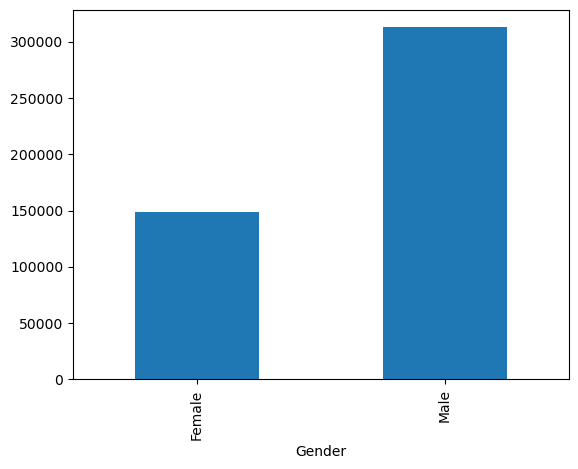

In [201]:
print(data_hang.groupby(['Gender'])['Total'].sum())
data_hang.groupby(['Gender'])['Total'].sum().plot(kind='bar')

### Age-group wise suicide rates by Hanging:

In [202]:
data_hang.groupby(['Age_group'])['Total'].sum()

Age_group
0-14       7292
15-29    169622
30-44    159188
45-59     92455
60+       32398
Name: Total, dtype: int64

### State wise suicide rates by Hanging

State
A & N Islands         1332
Andhra Pradesh       33074
Arunachal Pradesh     1017
Assam                16818
Bihar                 1256
Chandigarh             585
Chhattisgarh         24038
D & N Haveli           470
Daman & Diu            131
Delhi (Ut)           10069
Goa                   1819
Gujarat              16663
Haryana               5117
Himachal Pradesh      1132
Jammu & Kashmir        370
Jharkhand             2518
Karnataka            43293
Kerala               53171
Lakshadweep              4
Madhya Pradesh       31522
Maharashtra          61651
Manipur                235
Meghalaya              735
Mizoram                608
Nagaland               200
Odisha               14393
Puducherry            4262
Punjab                2087
Rajasthan            12896
Sikkim                1206
Tamil Nadu           39880
Tripura               4172
Uttar Pradesh        14608
Uttarakhand            955
West Bengal          58668
Name: Total, dtype: int64


<AxesSubplot:xlabel='State'>

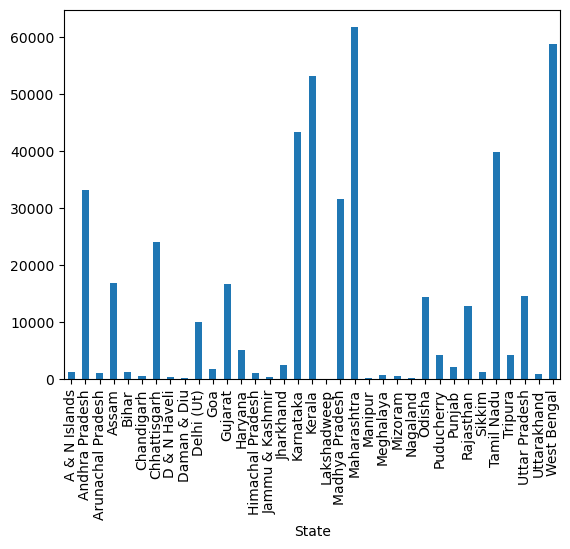

In [204]:
print(data_hang.groupby(['State'])['Total'].sum())
data_hang.groupby(['State'])['Total'].sum().plot(kind='bar')

### Gender-wise suicide by consuming insecticides

In [205]:
data_insec= data[data['Type']=='By Consuming Insecticides']

In [206]:
data_insec.groupby(['Gender'])['Total'].sum()

Gender
Female     94716
Male      180785
Name: Total, dtype: int64

### Age-group wise suicide rates by consuming insecticides

In [207]:
data_insec.groupby(['Age_group'])['Total'].sum()

Age_group
0-14      4980
15-29    99949
30-44    92554
45-59    56368
60+      21650
Name: Total, dtype: int64

### State wise suicide rates by consuming insecticides

State
A & N Islands           63
Andhra Pradesh       54555
Arunachal Pradesh       18
Assam                  522
Bihar                 1273
Chandigarh              18
Chhattisgarh         11877
D & N Haveli            26
Daman & Diu              6
Delhi (Ut)             763
Goa                    135
Gujarat              16126
Haryana               3232
Himachal Pradesh      1007
Jammu & Kashmir        366
Jharkhand             1159
Karnataka            13980
Kerala               18659
Lakshadweep              0
Madhya Pradesh       22152
Maharashtra          55773
Manipur                 20
Meghalaya               13
Mizoram                  1
Nagaland                 1
Odisha               12953
Puducherry             739
Punjab                 917
Rajasthan             8308
Sikkim                  27
Tamil Nadu           23335
Tripura               1118
Uttar Pradesh         5870
Uttarakhand            865
West Bengal          19624
Name: Total, dtype: int64


<AxesSubplot:xlabel='State'>

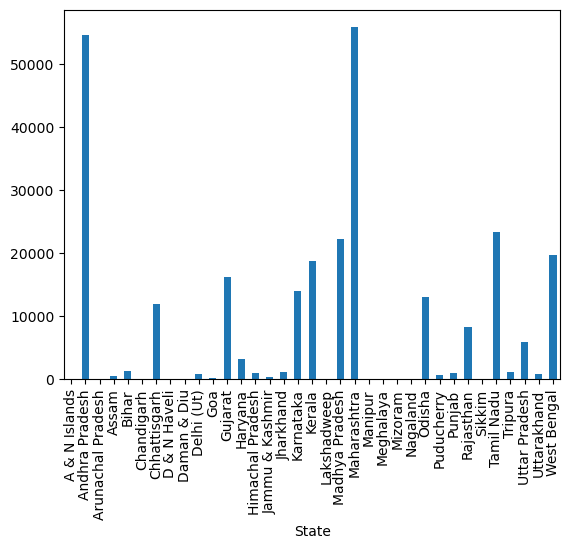

In [208]:
print(data_insec.groupby(['State'])['Total'].sum())
data_insec.groupby(['State'])['Total'].sum().plot(kind='bar')